In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
image_file = 'C:\\Users\\mha114\\Dropbox\\UiT\\Massimal\\Bilder\\Eksempler flyfoto\\Utenfor vega barren grounds (basert på Fagerli2014) - crop.png'

In [3]:
# Load image
image = tf.keras.utils.load_img(image_file,keep_aspect_ratio=True)
print(type(image))
print(image.size)

<class 'PIL.Image.Image'>
(1399, 867)


In [4]:
# Convert to TF tensor, and insert axis to create "batch of 1"
image_tensor = tf.expand_dims(tf.convert_to_tensor(np.array(image)), axis=0)
print(image_tensor.shape)

(1, 867, 1399, 3)


In [5]:
sizes=[1,400,500,1]       # Size of each patch (must start/end with 1 even if number of batches or channels is >1)
strides=[1,300,400,1]     # Distance from center of one patch to the next
rates=[1,1,1,1]           # Include all pixels in patches, without "holes"

patches = tf.image.extract_patches(image_tensor,sizes,strides,rates,padding = 'VALID')
print(patches.shape)

(1, 2, 3, 600000)


Note: Image patches are "flattened" into 1D vectors in the 4th dimension of patches.
These need to be reshaped to be viewed as regular images.

In [6]:
example_patch = tf.reshape(patches[0,1,1,:],[*sizes[1:3],image_tensor.shape[3]])
print(example_patch.shape)

(400, 500, 3)


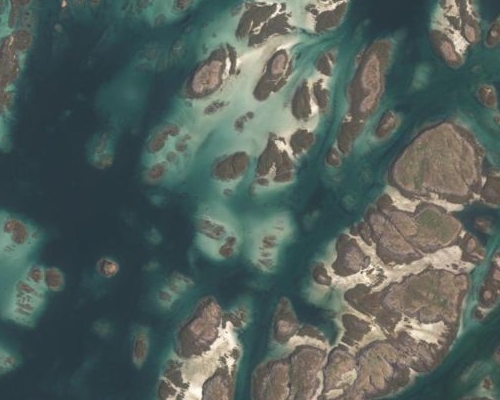

In [7]:
# Convert tensor -> numpy array -> PIL image
patch_image = PIL.Image.fromarray(np.array(example_patch))
display(patch_image)

In [8]:
# Reshpe batch tensor
# The first three dimensions are flattened into 1 ("patch index")
# The 4th dimension is expanded into 3 (width,height,RGB)
patch_batch = tf.reshape(patches,[np.prod(patches.shape[0:3]),*sizes[1:3],image_tensor.shape[3]])
print(patch_batch.shape)

(6, 400, 500, 3)


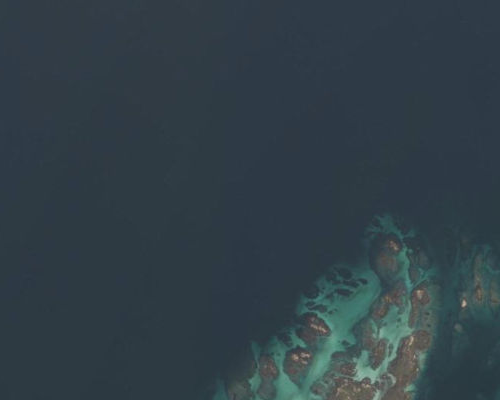

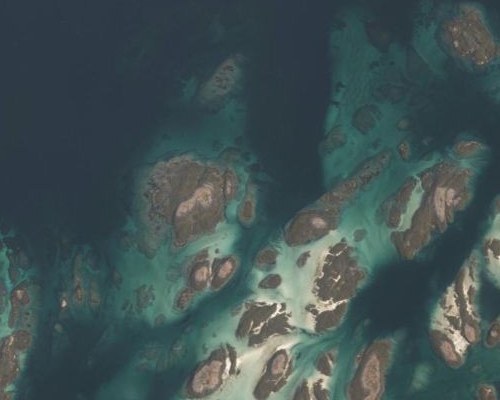

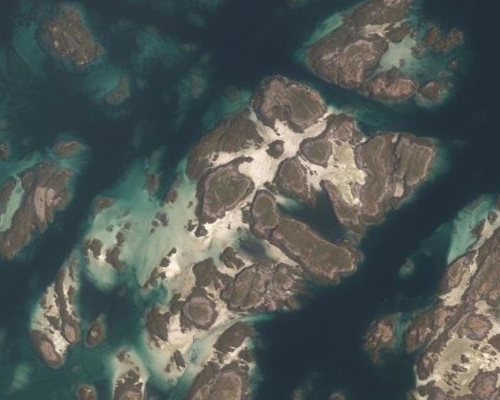

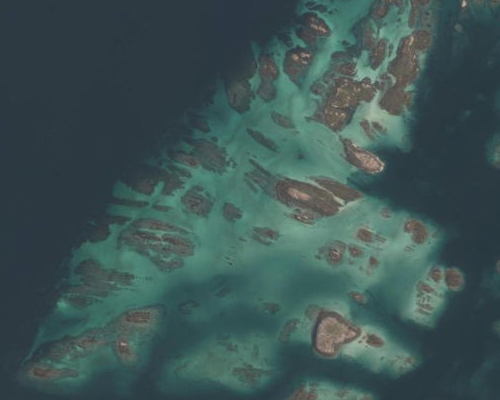

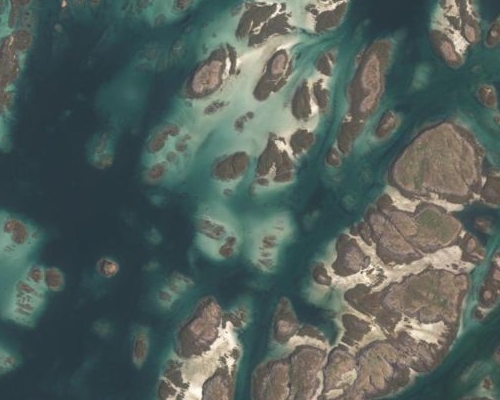

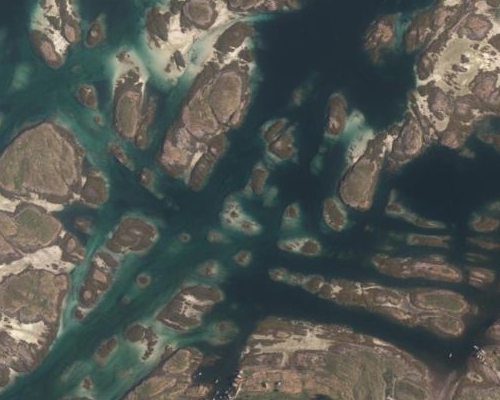

In [9]:
# Show all patches
for patch in patch_batch:
    display(PIL.Image.fromarray(np.array(patch)))